In [1]:
from datetime import datetime, timedelta
from pandas_datareader import data as pdr
import pandas as pd

import yfinance as yf
yf.pdr_override()

### Import Yahoo and save to csv function

In [43]:
# use "period" instead of start/end
# valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
# (optional, default is '1mo') period = "ytd"

# fetch data by interval (including intraday if period < 60 days)
# valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
# (optional, default is '1d')

def ImportYahooFin(name, pair, period_time=None, start_time=None, end_time=None, interval_time="1h"):
    data = None
    if (period_time is None):
        data = pdr.get_data_yahoo(pair+'=x', start=start_time, end=end_time, interval=interval_time)
    else:
        data = pdr.get_data_yahoo(pair+'=x', period=period_time, interval=interval_time)
        
    bars = data
    df = pd.DataFrame({
        'timestamp': bars.index,
        'open': bars['Open'],
        'high': bars['High'],
        'low': bars['Low'],
        'close': bars['Close'],
        'adj close': bars['Adj Close'],
        'volumn': bars['Volume']
    })
    
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df.reset_index(drop=True, inplace=True)
    df.to_csv(name+'.csv', index=False)
    df

In [44]:
date_now = datetime.today().strftime('%Y-%m-%d')
date_pre60 = (datetime.today() - timedelta(days=59)).strftime('%Y-%m-%d')
print(date_now, date_pre60)

2022-01-03 2021-11-05


In [48]:
tf_list = ['5m', '15m', '30m', '1h']
pair_list = ['EURUSD', 'GBPUSD', 'USDJPY', 'AUDUSD']

for pair in pair_list:
    t_now = datetime.today().strftime('%Y_%m_%d')
    for tf in tf_list:
        ImportYahooFin(f"{pair}_{tf}_{t_now}", pair, None, date_pre60, date_now, tf)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [37]:
ImportYahooFin('EURUSD_m30_2022_01_03', 'EURUSD', None, date_pre60, date_now, '30m')

[*********************100%***********************]  1 of 1 completed


### === test code  below ===

In [39]:
EURUSD = pdr.get_data_yahoo("EURUSD=x", start='2021-01-01', end='2021-07-01')
EURUSD

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-31,1.229906,1.230951,1.222300,1.229990,1.229990,0
2021-01-01,1.217285,1.221699,1.213499,1.218027,1.218027,0
2021-01-04,1.224905,1.230999,1.217137,1.225070,1.225070,0
2021-01-05,1.225295,1.229483,1.224995,1.225160,1.225160,0
2021-01-06,1.229861,1.235025,1.226693,1.230027,1.230027,0
...,...,...,...,...,...,...
2021-06-24,1.193161,1.195672,1.191995,1.193317,1.193317,0
2021-06-25,1.192791,1.197447,1.192791,1.193033,1.193033,0
2021-06-28,1.194215,1.194600,1.190462,1.194215,1.194215,0


In [9]:
data = EURUSD

<AxesSubplot:xlabel='Date'>

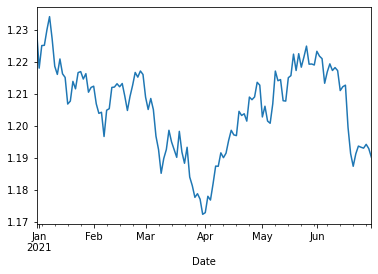

In [10]:
data.Close.plot()

In [4]:
GBPUSD = pdr.get_data_yahoo("GBPUSD=x", start='2021-11-02', end='2021-12-31', interval = "15m")
GBPUSD

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2021-11-01 17:00:00+00:00,1.366195,1.366382,1.365672,1.366251,1.366251,0
2021-11-01 17:15:00+00:00,1.366382,1.366419,1.365822,1.365896,1.365896,0
2021-11-01 17:30:00+00:00,1.365430,1.366288,1.365393,1.365393,1.365393,0
2021-11-01 17:45:00+00:00,1.365467,1.365952,1.365095,1.365915,1.365915,0
2021-11-01 18:00:00+00:00,1.366102,1.366176,1.365300,1.366008,1.366008,0
...,...,...,...,...,...,...
2021-12-30 15:45:00+00:00,1.350202,1.350311,1.349418,1.349655,1.349655,0
2021-12-30 16:00:00+00:00,1.349819,1.350020,1.349018,1.349746,1.349746,0
2021-12-30 16:15:00+00:00,1.349673,1.350384,1.349309,1.349837,1.349837,0
